# 1. Data Exploration - Gold Price Forecasting

**Objective:** Understand the dataset structure, quality, and key characteristics.

**Author:** Félix Jouary  
**Dataset:** Kaggle Gold Price Dataset

## 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1.2 Load Dataset

In [2]:
# Load the daily dataset (most granular)
df = pd.read_csv('../data/raw/Daily.csv', na_values=['#N/A', '#N/A N/A', 'N/A'])

# Fix numeric columns - remove commas and convert to float
for col in df.columns:
    if col != 'Date':
        df[col] = df[col].replace({',': ''}, regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset shape: (11626, 20)
Number of rows: 11626
Number of columns: 20


In [3]:
# First look at the data
df.head(10)

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,12/29/1978,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/1979,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1979,226.8,137.3,43164.9,111.5,263.7,359.6,1792.9,NaN,NaN,735.6,138160.5,851.3,4454.6,NaN,NaN,107470.0,NaN,194.6,193.6
3,1/3/1979,218.6,134.0,43717.9,108.0,264.4,365.9,1802.2,NaN,NaN,739.4,138877.0,855.7,4477.7,NaN,NaN,108027.4,NaN,192.2,193.0
4,1/4/1979,223.2,136.8,43674.9,110.7,264.1,366.4,1811.7,NaN,NaN,743.4,139616.3,860.3,4501.5,NaN,NaN,108602.5,NaN,193.0,194.6
5,1/5/1979,225.5,138.4,44582.5,111.6,268.4,373.7,1843.6,NaN,NaN,756.4,142069.1,875.4,4580.6,NaN,NaN,110510.4,NaN,196.4,197.9
6,1/8/1979,223.1,136.4,44436.2,110.2,269.5,372.6,1841.3,NaN,NaN,750.9,141870.9,869.7,4574.2,NaN,NaN,110356.3,NaN,197.2,197.9
7,1/9/1979,224.0,137.3,44045.6,111.0,266.3,372.8,1822.5,NaN,NaN,743.3,140446.7,860.9,4528.3,NaN,NaN,109248.4,NaN,195.0,195.9
8,1/10/1979,220.7,135.5,43366.4,109.9,261.8,365.9,1803.5,NaN,NaN,735.6,138981.0,852.0,4481.0,NaN,NaN,108108.3,NaN,192.0,192.7
9,1/11/1979,220.7,135.9,43770.6,110.2,262.5,370.9,1814.6,NaN,NaN,740.1,139833.8,857.2,4508.5,NaN,NaN,108771.7,NaN,192.4,193.8


In [4]:
# Last rows
df.tail(10)

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
11616,7/10/2023,1922.8,1749.8,272037.7,1496.8,2554.6,1704.6,158714.6,13896.7,50154.5,7212.8,29216946.0,7062.4,67507.6,45468451.6,59418.6,2501082.1,174864.2,36158.8,2881.9
11617,7/11/2023,1934.0,1757.7,271410.5,1496.5,2562.3,1701.9,159349.2,13943.4,50497.6,7254.6,29301276.5,7103.4,67295.7,45803671.8,59805.7,2501931.8,174683.5,35865.5,2899.9
11618,7/12/2023,1953.3,1754.7,270336.7,1503.0,2576.2,1694.9,160194.0,13990.5,51078.0,7328.0,29160815.7,7174.5,67683.8,46240470.9,60399.6,2492156.9,176690.8,35455.5,2875.5
11619,7/13/2023,1958.1,1747.3,270348.0,1493.1,2568.8,1681.4,160602.2,13999.7,51048.7,7346.0,29288511.9,7191.9,67652.6,46345085.5,60489.8,2480222.8,176578.9,35132.5,2846.8
11620,7/14/2023,1953.7,1738.3,270919.6,1489.9,2582.0,1682.9,160391.5,13942.2,51138.9,7329.9,29246889.0,7175.9,67715.2,46197190.2,60367.4,2477389.3,176481.0,35348.1,2853.0
11621,7/17/2023,1949.6,1735.6,270624.0,1491.1,2568.8,1677.6,159940.3,13982.7,51361.4,7315.3,29228403.2,7160.9,67407.4,46090493.6,60236.8,2465659.1,176457.3,35146.6,2857.8
11622,7/18/2023,1975.0,1761.0,274742.3,1515.2,2604.6,1697.5,162067.1,14192.0,53214.8,7410.0,29621050.0,7254.2,67353.4,46696900.0,61030.1,2498513.3,179012.4,35286.1,2902.7
11623,7/19/2023,1975.4,1765.0,275818.1,1530.2,2602.1,1698.0,162141.7,14273.3,52910.5,7409.9,29616422.6,7255.7,67280.4,46703200.1,60837.8,2503617.9,179830.5,35368.8,2919.1
11624,7/20/2023,1976.1,1776.4,277563.0,1537.5,2604.5,1714.5,162159.4,14193.1,53022.9,7412.8,29681022.0,7258.2,67653.8,46738717.2,60851.4,2522906.6,178719.3,35457.8,2917.6
11625,7/21/2023,1960.6,1762.5,277758.2,1524.7,2590.3,1697.3,160788.8,14093.0,52814.6,7354.6,29461936.2,7201.3,67530.9,46389756.6,60392.8,2524782.3,177763.1,35194.5,2910.2


## 1.3 Data Types and Structure

In [5]:
# Data types
print("Data Types:")
print(df.dtypes)

Data Types:
Date     object
USD     float64
EUR     float64
JPY     float64
GBP     float64
CAD     float64
CHF     float64
INR     float64
CNY     float64
TRY     float64
SAR     float64
IDR     float64
AED     float64
THB     float64
VND     float64
EGP     float64
KRW     float64
RUB     float64
ZAR     float64
AUD     float64
dtype: object


In [6]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11626 entries, 0 to 11625
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11626 non-null  object 
 1   USD     11626 non-null  float64
 2   EUR     11626 non-null  float64
 3   JPY     11624 non-null  float64
 4   GBP     11626 non-null  float64
 5   CAD     11624 non-null  float64
 6   CHF     11624 non-null  float64
 7   INR     11624 non-null  float64
 8   CNY     10055 non-null  float64
 9   TRY     10581 non-null  float64
 10  SAR     11624 non-null  float64
 11  IDR     11624 non-null  float64
 12  AED     11624 non-null  float64
 13  THB     11624 non-null  float64
 14  VND     8775 non-null   float64
 15  EGP     9035 non-null   float64
 16  KRW     11624 non-null  float64
 17  RUB     7965 non-null   float64
 18  ZAR     11624 non-null  float64
 19  AUD     11624 non-null  float64
dtypes: float64(19), object(1)
memory usage: 1.8+ MB


## 1.4 Missing Values Analysis

In [7]:
# Count missing values per column
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct.round(2)
}).sort_values('Missing %', ascending=False)

print("Missing Values Summary:")
print(missing_df)

Missing Values Summary:
      Missing Count  Missing %
RUB            3661      31.49
VND            2851      24.52
EGP            2591      22.29
CNY            1571      13.51
TRY            1045       8.99
SAR               2       0.02
IDR               2       0.02
ZAR               2       0.02
KRW               2       0.02
THB               2       0.02
AED               2       0.02
AUD               2       0.02
INR               2       0.02
CHF               2       0.02
CAD               2       0.02
JPY               2       0.02
USD               0       0.00
GBP               0       0.00
EUR               0       0.00
Date              0       0.00


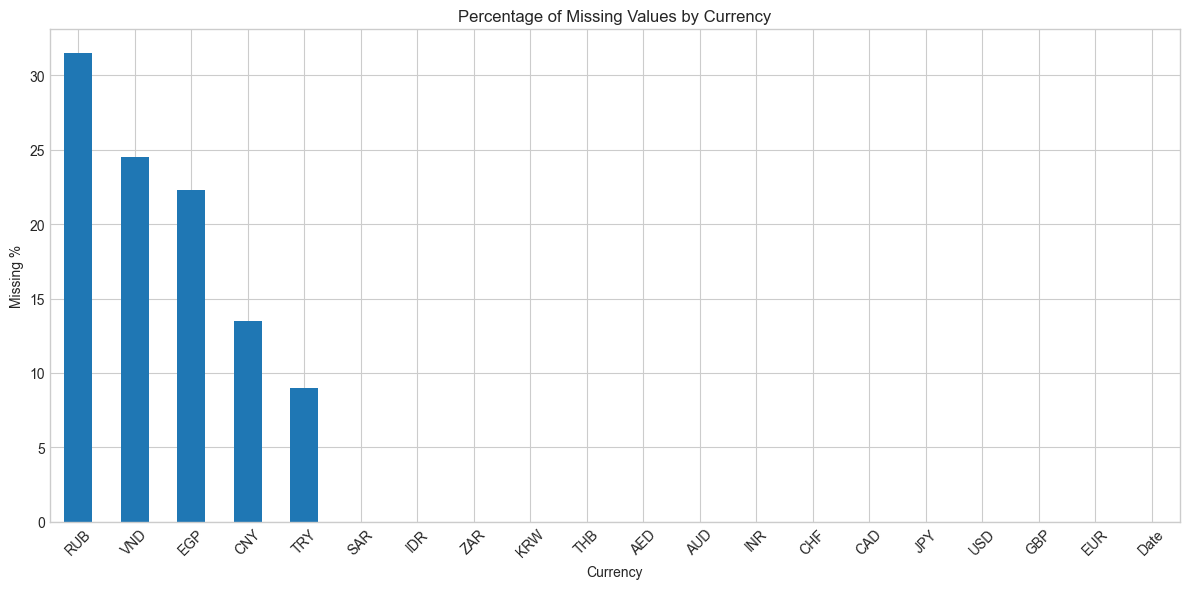

In [8]:
# Visualize missing values
plt.figure(figsize=(12, 6))
missing_df['Missing %'].plot(kind='bar')
plt.title('Percentage of Missing Values by Currency')
plt.xlabel('Currency')
plt.ylabel('Missing %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../reports/figures/missing_values.png', dpi=150)
plt.show()

## 1.5 Statistical Summary

In [9]:
# Statistical description
df.describe()

,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
count,11626.000000,11626.000000,11624.000000,11626.000000,11624.000000,11624.000000,11624.000000,10055.000000,10581.000000,11624.000000,1.162400e+04,11624.000000,11624.000000,8.775000e+03,9035.000000,1.162400e+04,7965.000000,11624.000000,11624.000000
mean,743.548667,622.438302,89683.954852,494.800662,911.109033,865.940408,37991.445845,5260.113088,3114.044391,2768.630325,7.118772e+06,2732.749991,23467.664255,1.671098e+07,8643.564892,7.884677e+05,41368.074087,7030.644864,946.868522
std,519.592487,439.322262,53903.509779,398.164810,623.171949,402.593487,42088.673087,3613.820956,7041.958762,1961.563651,8.353224e+06,1907.591448,17477.219413,1.398713e+07,11397.295549,6.569238e+05,43508.628978,8805.521128,669.193747
min,216.900000,133.800000,26851.600000,108.000000,256.800000,359.600000,1782.000000,809.600000,0.100000,718.100000,1.351224e+05,825.500000,4374.700000,1.536705e+06,863.400000,1.068198e+05,132.700000,187.100000,189.800000
25%,355.700000,308.025000,43146.700000,219.000000,459.575000,502.275000,6457.650000,2214.100000,3.000000,1318.050000,7.071779e+05,1304.800000,9646.950000,4.132424e+06,1191.450000,3.029711e+05,7728.500000,986.000000,477.000000
50%,425.800000,376.300000,75984.650000,260.800000,538.500000,738.100000,13572.500000,3363.400000,527.100000,1564.650000,2.827488e+06,1563.700000,12690.700000,1.006930e+07,3265.200000,3.881157e+05,20875.800000,2100.550000,560.650000
75%,1222.000000,997.400000,131559.225000,793.750000,1410.125000,1179.050000,74682.000000,8307.500000,2873.400000,4584.250000,1.467402e+07,4488.175000,40331.625000,2.868317e+07,9905.250000,1.360118e+06,72159.100000,13087.975000,1424.800000
max,2067.200000,1863.700000,279051.600000,1635.000000,2768.500000,1894.100000,167324.400000,14373.900000,53214.800000,7753.700000,3.040792e+07,7592.600000,69706.700000,4.802591e+07,63287.300000,2.708868e+06,285610.400000,39005.500000,3051.800000


In [10]:
# Focus on USD (our main target)
print("USD Gold Price Statistics:")
print(df['USD'].describe())

USD Gold Price Statistics:
count    11626.000000
mean       743.548667
std        519.592487
min        216.900000
25%        355.700000
50%        425.800000
75%       1222.000000
max       2067.200000
Name: USD, dtype: float64


## 1.6 Date Analysis

In [11]:
# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total days covered: {(df['Date'].max() - df['Date'].min()).days}")

Date range: 1978-12-29 00:00:00 to 2023-07-21 00:00:00
Total days covered: 16275


## 1.7 Gold Price Evolution (USD)

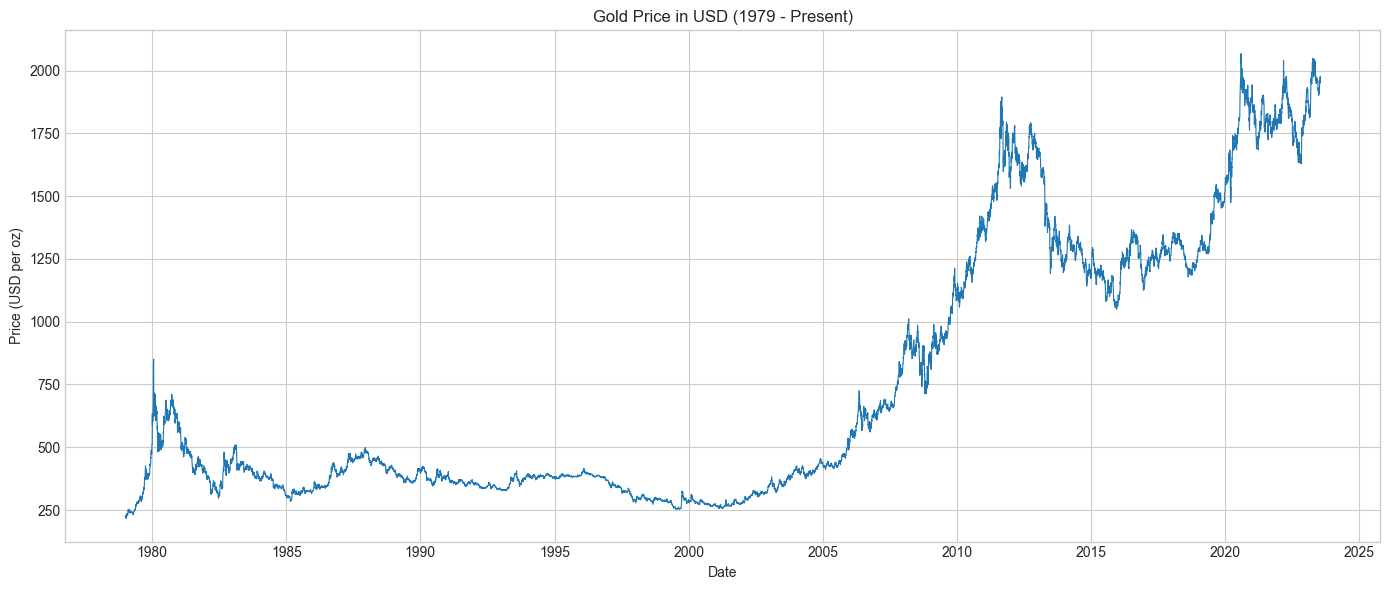

In [12]:
# Plot USD gold price over time
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['USD'], linewidth=0.8)
plt.title('Gold Price in USD (1979 - Present)')
plt.xlabel('Date')
plt.ylabel('Price (USD per oz)')
plt.tight_layout()
plt.savefig('../reports/figures/gold_price_usd.png', dpi=150)
plt.show()

## 1.8 Distribution Analysis

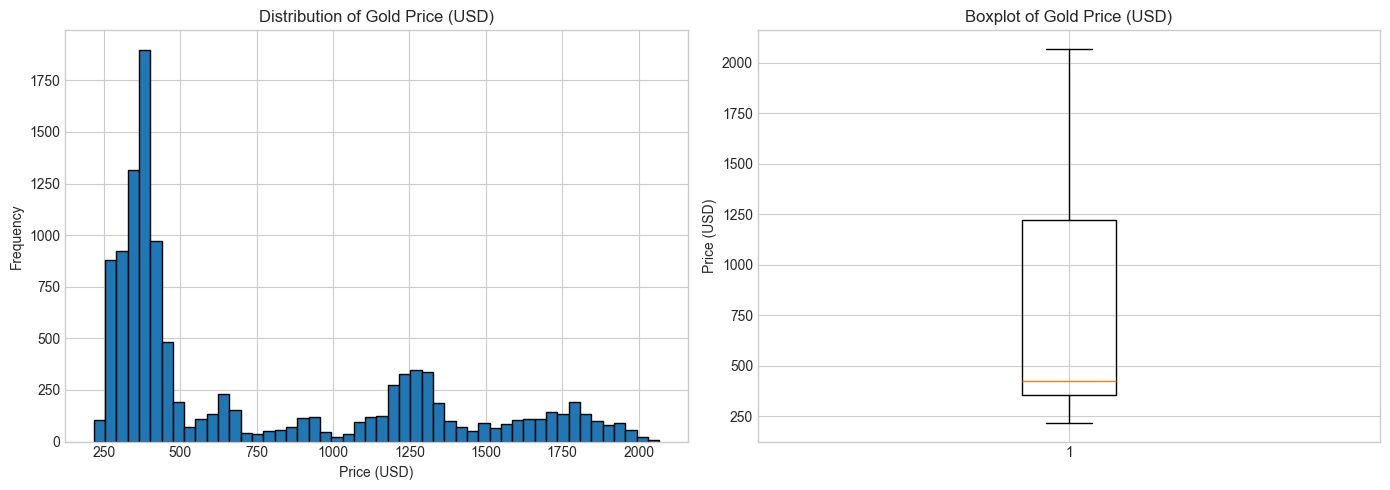

In [13]:
# Distribution of USD price
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Get USD data as numpy array (force float conversion)
usd_data = df['USD'].dropna().astype(float).values

# Histogram
axes[0].hist(usd_data, bins=50, edgecolor='black')
axes[0].set_title('Distribution of Gold Price (USD)')
axes[0].set_xlabel('Price (USD)')
axes[0].set_ylabel('Frequency')

# Boxplot
axes[1].boxplot(usd_data)
axes[1].set_title('Boxplot of Gold Price (USD)')
axes[1].set_ylabel('Price (USD)')

plt.tight_layout()
plt.savefig('../reports/figures/usd_distribution.png', dpi=150)
plt.show()

## 1.9 Correlation Analysis

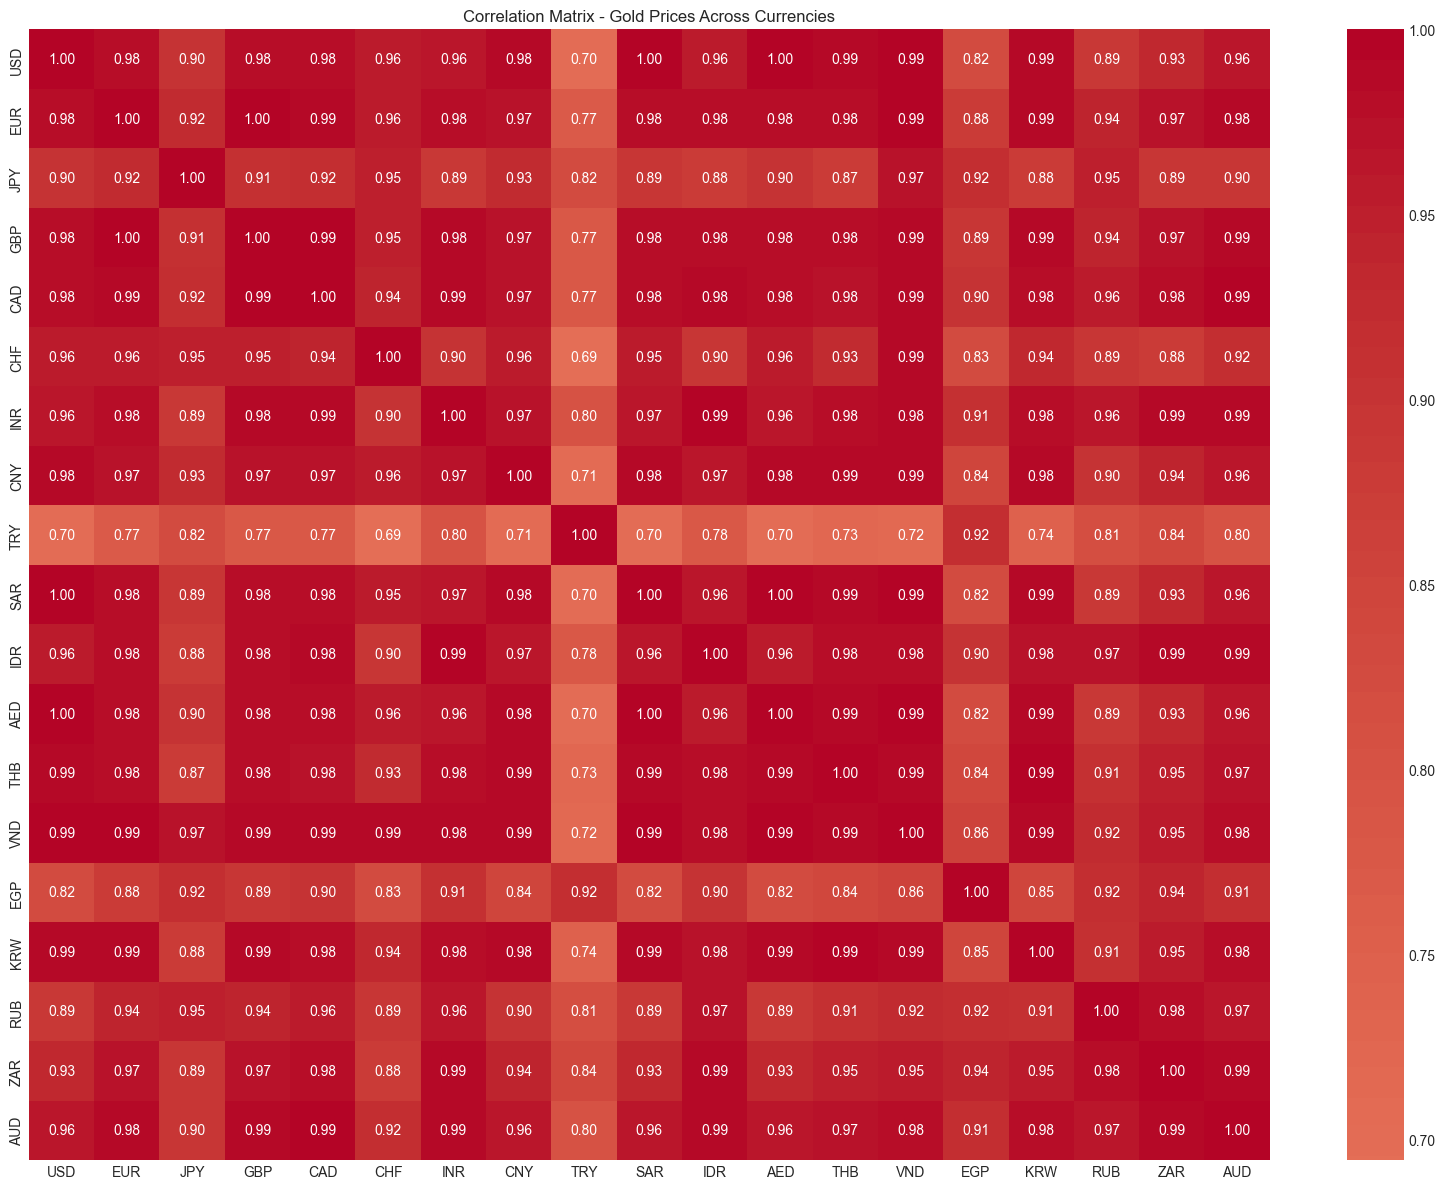

In [14]:
# Select only numeric columns (excluding Date)
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Correlation matrix
corr_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix - Gold Prices Across Currencies')
plt.tight_layout()
plt.savefig('../reports/figures/correlation_matrix.png', dpi=150)
plt.show()

## 1.10 Key Findings Summary

**Run all cells above, then fill in:**

- Dataset shape: `___`
- Date range: `___`
- USD price range: `___`
- Main missing values issues: `___`
- Key correlations observed: `___`